<a href="https://colab.research.google.com/github/hyunwjang/deep/blob/main/_2_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0_%ED%9A%8C%EA%B7%80_%EB%B6%84%EC%84%9D_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 텐서플로우 회귀 분석 모델

- 다양한 방법이 존재
- 텐서플로우2만 사용하는 방법, 케라스를 이용한 방법, 둘을 모두 섞은 방법 등등  


## 선형 회귀(Linear Regression)

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
learning_rate = 0.01
training_steps = 1000

In [ ]:
X = np.random.randn(50)
Y = 2 *X + np.random.randn(50)

In [ ]:
W = tf.Variable(np.random.randn(), name = 'weight')
b = tf.Variable(np.random.randn(), name = 'bias')

def linear_regression(x):
  return W*x+b

def mean_square(y_pred, y_true):
  return tf.reduce_mean(tf.square(y_pred  - y_true))

optimizer = tf.optimizers.SGD(learning_rate)


In [ ]:
def run_optimizeation():
  with tf.GradientTape() as tape:
    pred = linear_regression(X)
    loss = mean_square(pred, Y)
  gradients = tape.gradient(loss, [W,b])

  optimizer.apply_gradients(zip(gradients, [W,b]))


In [ ]:
for step in range(1, training_steps + 1):
  run_optimizeation()

  if step% 50 == 0:
    pred = linear_regression(X)
    loss = mean_square(pred, Y)
    print("step: {:4d}\tloss: {:.4f}\tW: {:.4f}\tb: {:.4f}".format(step, loss, W.numpy(), b.numpy()))

step:   50	loss: 1.1237	W: 1.7646	b: -0.0025
step:  100	loss: 1.0531	W: 1.9370	b: 0.0567
step:  150	loss: 1.0424	W: 2.0027	b: 0.0827
step:  200	loss: 1.0408	W: 2.0279	b: 0.0939
step:  250	loss: 1.0406	W: 2.0376	b: 0.0986
step:  300	loss: 1.0405	W: 2.0413	b: 0.1006
step:  350	loss: 1.0405	W: 2.0428	b: 0.1014
step:  400	loss: 1.0405	W: 2.0433	b: 0.1017
step:  450	loss: 1.0405	W: 2.0435	b: 0.1019
step:  500	loss: 1.0405	W: 2.0436	b: 0.1019
step:  550	loss: 1.0405	W: 2.0437	b: 0.1020
step:  600	loss: 1.0405	W: 2.0437	b: 0.1020
step:  650	loss: 1.0405	W: 2.0437	b: 0.1020
step:  700	loss: 1.0405	W: 2.0437	b: 0.1020
step:  750	loss: 1.0405	W: 2.0437	b: 0.1020
step:  800	loss: 1.0405	W: 2.0437	b: 0.1020
step:  850	loss: 1.0405	W: 2.0437	b: 0.1020
step:  900	loss: 1.0405	W: 2.0437	b: 0.1020
step:  950	loss: 1.0405	W: 2.0437	b: 0.1020
step: 1000	loss: 1.0405	W: 2.0437	b: 0.1020


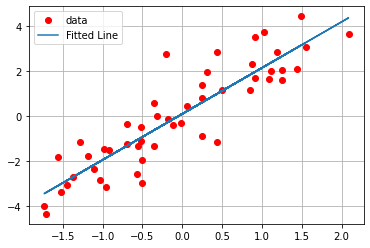

In [ ]:
plt.plot(X, Y, 'ro',label= 'data')
plt.plot(X, np.array(W* X + b), label ='Fitted Line')
plt.legend()
plt.grid()
plt.show()

## 다항 회귀 (Nonlinear Regression)


### modules import

In [ ]:
from tensorflow.keras.optimizers import Adam

### Hyper Parameters

In [ ]:
epochs =1000
learning_rate = 0.04

### 변수 지정

In [ ]:
a = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())
c = tf.Variable(np.random.randn())

In [ ]:
print(a.numpy())
print(b.numpy())
print(c.numpy())

-0.6866375
0.5993893
0.36723146


### 데이터 지정

In [ ]:
X = np.random.randn(50)
Y = X**2 + X*np.random.randn(50)

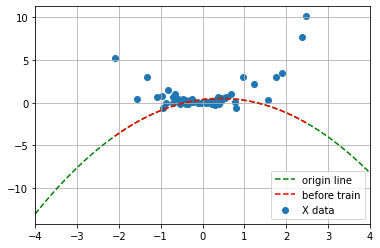

In [ ]:
line_x = np.arange(min(X),max(X),0.001)
line_y = a*line_x**2 +b*line_x +c

x_ = np.arange(-4.0, 4.0, 0.001)
y_ = a*x_**2 +b*x_ +c

plt.scatter(X,Y, label = 'X data')
plt.plot(x_,y_,'g--', label = 'origin line')
plt.plot(line_x, line_y, 'r--',label = 'before train')
plt.xlim(-4.0 , 4.0)
plt.legend()
plt.grid()
plt.show()

### Util Functions

In [ ]:
def compute_loss():
  pred_y = a*(np.array(X)**2) + b*np.array(X) +c
  loss = tf.reduce_mean((Y - pred_y)**2)
  return loss

### Optimizer

In [ ]:
optimizer = Adam(learning_rate = learning_rate)

### 학습

In [ ]:
for epoch in range(1, epochs+1,1):
  optimizer.minimize(compute_loss, var_list =[a,b,c])

  if epoch % 100 == 0:
    print("epoch: {:4d}\ta: {:.4f}\tb: {:.4f}\tc : {:.4f}".format(epoch, a.numpy(),b.numpy(),c.numpy()))


epoch:  100	a: 1.1770	b: 0.2466	c : -0.0657
epoch:  200	a: 1.2179	b: 0.2176	c : -0.1151
epoch:  300	a: 1.2179	b: 0.2175	c : -0.1152
epoch:  400	a: 1.2179	b: 0.2175	c : -0.1152
epoch:  500	a: 1.2179	b: 0.2175	c : -0.1152
epoch:  600	a: 1.2179	b: 0.2175	c : -0.1152
epoch:  700	a: 1.2179	b: 0.2175	c : -0.1152
epoch:  800	a: 1.2179	b: 0.2175	c : -0.1152
epoch:  900	a: 1.2179	b: 0.2175	c : -0.1152
epoch: 1000	a: 1.2179	b: 0.2175	c : -0.1152


### 학습 후의 회귀선

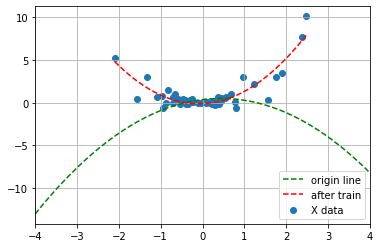

In [ ]:
line_x = np.arange(min(X),max(X),0.001)
line_y = a*line_x**2 +b*line_x +c


plt.scatter(X,Y, label = 'X data')
plt.plot(x_,y_,'g--', label = 'origin line')
plt.plot(line_x, line_y, 'r--',label = 'after train')
plt.xlim(-4.0 , 4.0)
plt.legend()
plt.grid()
plt.show()

## 로지스틱 회귀(Logistic Regression)
- 다항 분류, MNIST

### modules import

In [ ]:
from tensorflow.keras.datasets import mnist

### 하이퍼 파라미터 (Hyper Parameter)


In [ ]:
num_classes = 10
num_features =784

learning_rage = 0.1
training_steps = 1000
batch_size = 256


### 데이터 로드

In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

x_train, x_test = x_train.reshape([-1, num_features]),x_test.reshape([-1,num_features])

x_train, x_test = x_train / 255., x_test / 255.


11490434/11490434 [==============================] - 0s 0us/step


### tf.data API 사용
- 03 에서 다시 다룸 

In [ ]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

### 변수 지정

In [ ]:
W = tf.Variable(tf.random.normal([num_features, num_classes]),name = 'weight')
b  = tf.Variable(tf.zeros([num_classes]), name = 'bias')

### Util Functions

In [ ]:
def logistic_regression(x):
  return tf.nn.softmax(tf.matmul(x, W) + b)

def cross_entropy(pred_y, true_y):
  true_y = tf.one_hot(true_y, depth = num_classes)
  pred_y = tf.clip_by_value(pred_y, 1e-9, 1.)

  return tf.reduce_mean(-tf.reduce_sum(true_y * tf.math.log(pred_y), 1))

def accuracy(y_pred, y_true):
  correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
  return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### Optimizer

In [ ]:
optimizer = tf.optimizers.SGD(learning_rate)

In [ ]:
def run_optimization(x,y ):
  with tf.GradientTape() as tape:
    pred = logistic_regression(x)
    loss = cross_entropy(pred, y)

  graients = tape.gradient(loss, [W, b])

  optimizer.apply_gradients(zip(graients, [W,b]))

### 학습 진행

In [ ]:
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
  run_optimization(batch_x, batch_y)

  if step % 50 == 0 :
    pred = logistic_regression(batch_x)
    loss = cross_entropy(pred, batch_y)
    acc = accuracy(pred, batch_y)

    print("step : {:4d}\tloss: {:.4f}\taccuracy:{:.4f}".format(step, loss, acc))

step :   50	loss: 1.6148	accuracy:0.6953
step :  100	loss: 1.7756	accuracy:0.6875
step :  150	loss: 1.7979	accuracy:0.7188
step :  200	loss: 1.6324	accuracy:0.7422
step :  250	loss: 1.1042	accuracy:0.7344
step :  300	loss: 1.2247	accuracy:0.7266
step :  350	loss: 1.2172	accuracy:0.7461
step :  400	loss: 1.2842	accuracy:0.7383
step :  450	loss: 1.2888	accuracy:0.7578
step :  500	loss: 1.4597	accuracy:0.7500
step :  550	loss: 1.3634	accuracy:0.7266
step :  600	loss: 1.0703	accuracy:0.7461
step :  650	loss: 1.3332	accuracy:0.7539
step :  700	loss: 1.2339	accuracy:0.7695
step :  750	loss: 1.1905	accuracy:0.7695
step :  800	loss: 1.2020	accuracy:0.7578
step :  850	loss: 1.1322	accuracy:0.7422
step :  900	loss: 1.0092	accuracy:0.8164
step :  950	loss: 1.2749	accuracy:0.7539
step : 1000	loss: 1.0897	accuracy:0.7617


###  테스트

In [ ]:
pred = logistic_regression(x_test)
print("Test Accuracy : {}".format(accuracy(pred, y_test)))

Test Accuracy : 0.7912999987602234


### 시각화

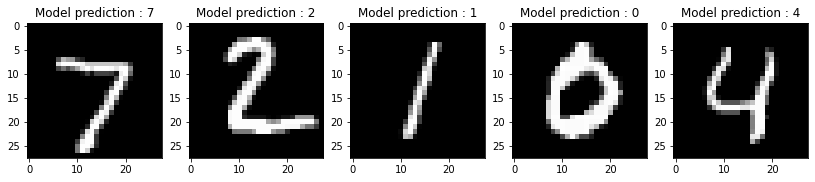

In [ ]:
num_images = 5
test_images = x_test[:num_images]
predictions = logistic_regression(test_images)

plt.figure(figsize =(14,8))
for i in range(1, num_images+1, 1):
  plt.subplot(1, num_images, i)
  plt.imshow(np.reshape(test_images[i-1], [28,28]), cmap = 'gray')
  plt.title("Model prediction : {}".format(np.argmax(predictions.numpy()[i-1])))

plt.show()